In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(
    '/Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
    ))
sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Get physical constants from Scipy
import scipy.constants as con
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
kb = con.physical_constants['Boltzmann constant in eV/K'][0]

import scipy.integrate as int

import scipy.io as sio

import scipy.optimize as opt

from misloc_mispol_package.parameterize import displaced_osc_model as dom


In [2]:
## This needs to be in a seperate cell from the imports
## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 150,  # to adjust notebook inline plot size
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
#     'figure.figsize': [3.5, 2.625], # 4 x 3
#     'figure.figsize': [4, 3], # 4 x 3
    'figure.figsize': [4*1.125, 3*1.125], # 4x3, full slide in keynote
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)


In [3]:
path_to_data = (
    "/Users/chair/Documents/Academia/TAHz/"+
    "modeling_TAHz_emission/data")


In [4]:
emily_model = dom.mol_fluo_model(
    num_vib_modes=1,
    hbar_omega_eg_0=0.,
    script_d=[1.6],
    hbar_omega_0=[1],
    hbar_gamma=[.18],
    T=.3/kb,
#     T=0.00001,
    )


integrand_hbarws = np.linspace(-5, 10, 3)
ts, integrand = emily_model.emission_lineshape(
    integrand_hbarws/hbar,
#     mode_idx,
    t_bound = 30,
    t_points = 1000,
    return_integrand=1
    )

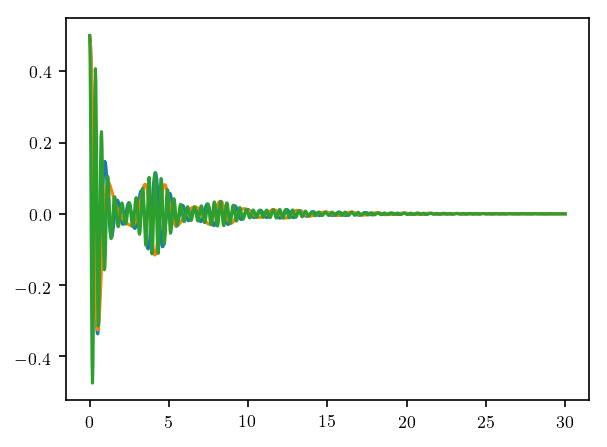

In [5]:
for integ in integrand:
    plt.plot(ts, integ)

Plot g to see its real and imaginary parts

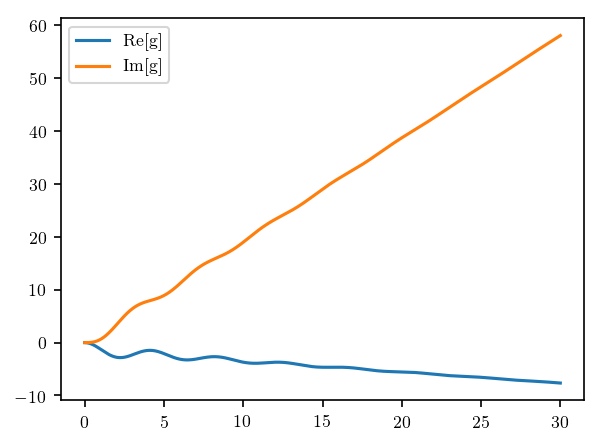

In [6]:
k2 = -emily_model.g(ts)
plt.plot(ts, np.real(k2), label='Re[g]')
plt.plot(ts, np.imag(k2), label='Im[g]')
plt.legend()

Text(0, 0.5, 'Emission Lineshape [a.u.]')

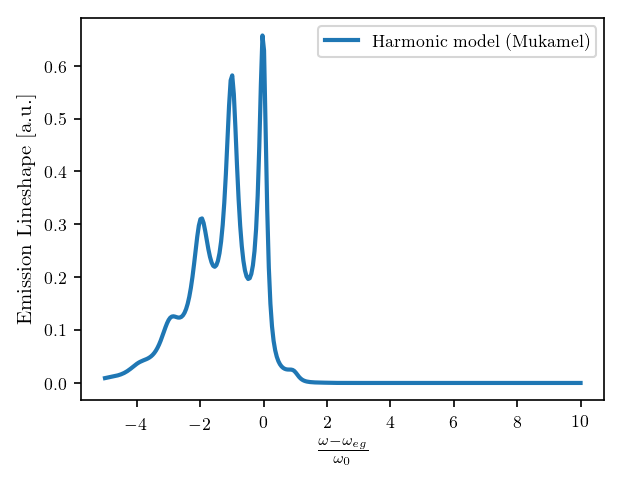

In [7]:
hbar_ws = np.linspace(-5, 10, 300)
model = emily_model.emission_lineshape(
    hbar_ws/hbar,
#     mode_idx,
    t_bound = 50,
    t_points = 1000,
    ns=np.linspace(1,50,50)
    )

plt.plot(hbar_ws, model, lw=2, label='Harmonic model (Mukamel)')

plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel(r'$\frac{\omega - \omega_{eg}}{\omega_0}$', fontsize=10)
plt.ylabel(r'Emission Lineshape [a.u.]', fontsize=10)

Text(0, 0.5, 'Emission Lineshape [a.u.]')

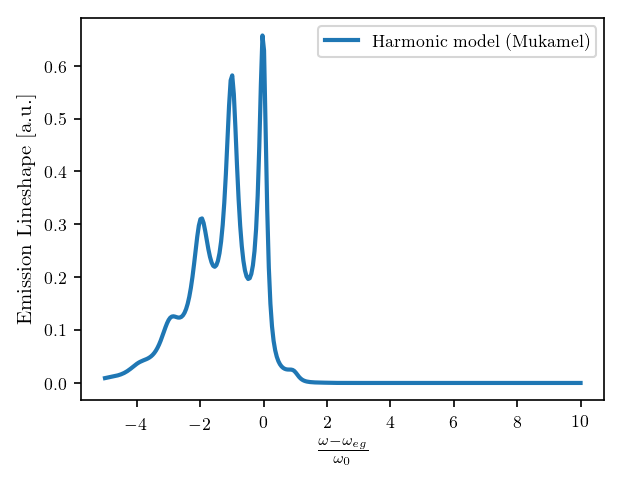

In [8]:
hbar_ws = np.linspace(-5, 10, 300)
model = emily_model.emission_lineshape(
    hbar_ws/hbar,
#     mode_idx,
    t_bound = 50,
    t_points = 1000,
    ns=np.linspace(1,50,50)
    )

plt.plot(hbar_ws, model, lw=2, label='Harmonic model (Mukamel)')

plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel(r'$\frac{\omega - \omega_{eg}}{\omega_0}$', fontsize=10)
plt.ylabel(r'Emission Lineshape [a.u.]', fontsize=10)

Text(0, 0.5, 'Emission Lineshape [a.u.]')

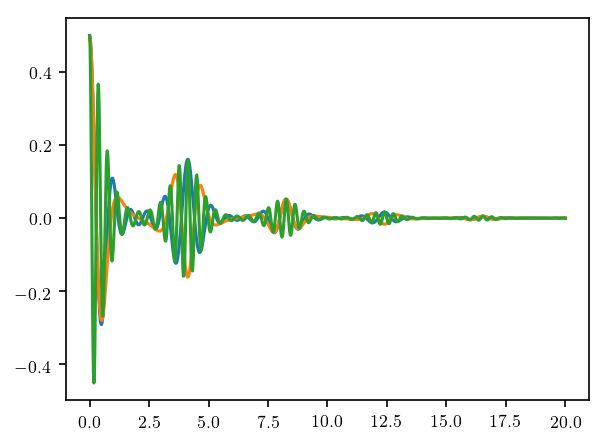

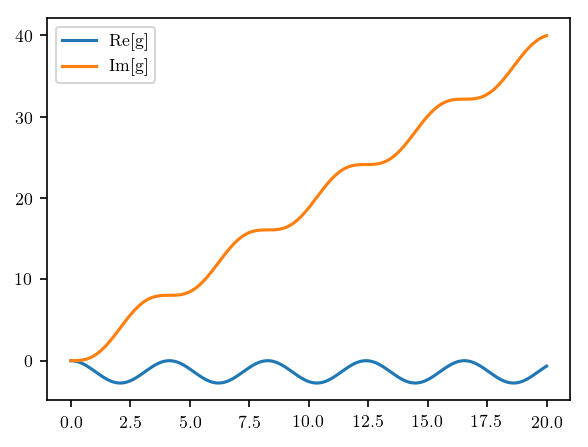

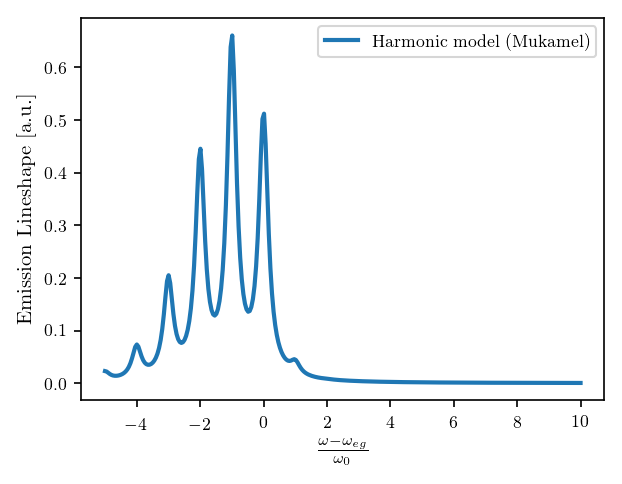

In [9]:
emily_model = dom.anda_mol_fluo_model(
    num_vib_modes=1,
    hbar_omega_eg_0=0.,
    script_d=[1.6],
    hbar_omega_0=[1],
    hbar_gamma=[.18],
    T=.3/kb,
#     T=0.00001,
    )
integrand_hbarws = np.linspace(-5, 10, 3)
ts, integrand = emily_model.emission_lineshape(
    integrand_hbarws/hbar,
#     mode_idx,
    t_bound = 20,
    t_points = 1000,
    return_integrand=1
    )

for integ in integrand:
    plt.plot(ts, integ)

plt.figure()

k2 = -emily_model.g(ts)
plt.plot(ts, np.real(k2), label='Re[g]')
plt.plot(ts, np.imag(k2), label='Im[g]')
plt.legend()

plt.figure()
hbar_ws = np.linspace(-5, 10, 300)
model = emily_model.emission_lineshape(
    hbar_ws/hbar,
#     mode_idx,
    t_bound = 50,
    t_points = 1000,
    ns=np.linspace(1,50,50)
    )

plt.plot(hbar_ws, model, lw=2, label='Harmonic model (Mukamel)')

plt.legend()
# plt.xlim([1.75, 3])
plt.xlabel(r'$\frac{\omega - \omega_{eg}}{\omega_0}$', fontsize=10)
plt.ylabel(r'Emission Lineshape [a.u.]', fontsize=10)

## Compute following anda matrix theorm implementation and see how it compares

In [10]:
basis_size = 20
test_hbarw0 = 1
d = 1.6

lambda_g = [0, 0, 0]
lambda_e = dom.displaced_lambdas([0, 0, 0], d)

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_harm_inst = dom.anharmonic_mat_exp_implementation(
    lambda_g,
    lambda_e,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )
    
em_lin_mat_thrm = anda_impl_harm_inst.emission_lineshape(
    hbar_ws)

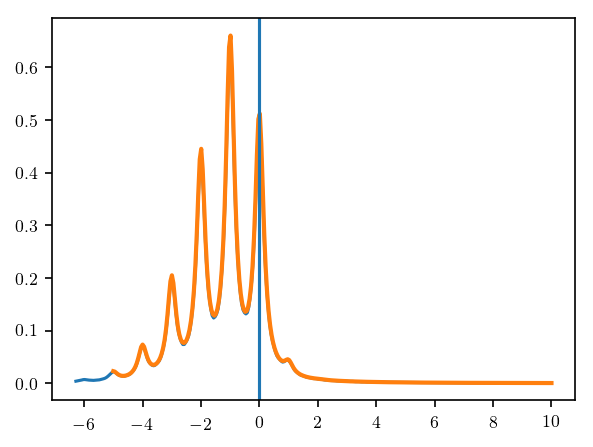

In [11]:
plt.plot((hbar_ws-d**2/2), em_lin_mat_thrm*2, label='mat.thrm.')
plt.plot(hbar_ws, model, lw=2, label='Harmonic model (Mukamel)')
plt.axvline(0)

So these are the same except for the shift of the Huang-Rys and a factor of 2. Let's load the data for figure 1 and check that out. 

In [12]:
anda_fig_1_thieved = np.loadtxt(
    os.path.join(path_to_data, 'Anharmonic_graph.txt'),
    delimiter=','
    )

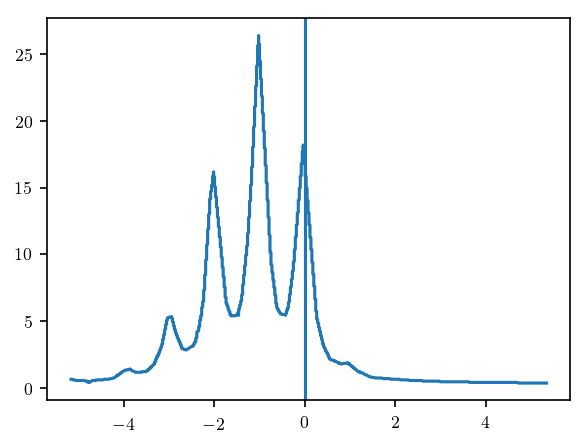

In [13]:
plt.plot(*anda_fig_1_thieved.T)
plt.axvline(0)

And try and recreat the model

In [36]:
def poly_from_lambdas(x, lambdas):
    
    y = np.zeros_like(x)
    for i, lam in enumerate(lambdas):
        y += lam * x**i 
    ## Add back in harmonic piece
    y += x**2/2 
    
    return y

In [37]:
basis_size = 20
test_hbarw0 = 1
d = 1.6

lambda_g =[
    0,
    0,
    0.500141 - .5, ## to account for H_0 
    - 0.0456629,
    0.00243193,
    - 0.000095158,
    2.99251*1e-6,
    - 7.93207*1e-8,
    + 1.82486*1e-9,
    - 3.71702*1e-11,
    6.80059*1e-13,
    - 1.13*1e-14,
    + 1.72033*1e-16,
    ]
lambda_e = dom.displaced_lambdas(lambda_g, d)

In [38]:
lambda_g

[0,
 0,
 0.00014099999999994672,
 -0.0456629,
 0.00243193,
 -9.5158e-05,
 2.9925099999999996e-06,
 -7.932070000000001e-08,
 1.82486e-09,
 -3.71702e-11,
 6.80059e-13,
 -1.1299999999999998e-14,
 1.7203299999999998e-16]

In [39]:
poly_from_lambdas(np.array([-1., 0, 1]), lambda_g)

array([0.54833406, 0.        , 0.45681779])

In [63]:
lambda_e

array([ 1.48438432e+00, -1.99430315e+00,  2.60887573e-01, -6.39277637e-02,
        3.32036657e-03, -1.28601538e-04,  4.02549008e-06, -1.06464643e-07,
        2.44664875e-09, -4.97972064e-11,  9.08005696e-13, -1.46030336e-14,
        1.72033000e-16])

(0, 50)

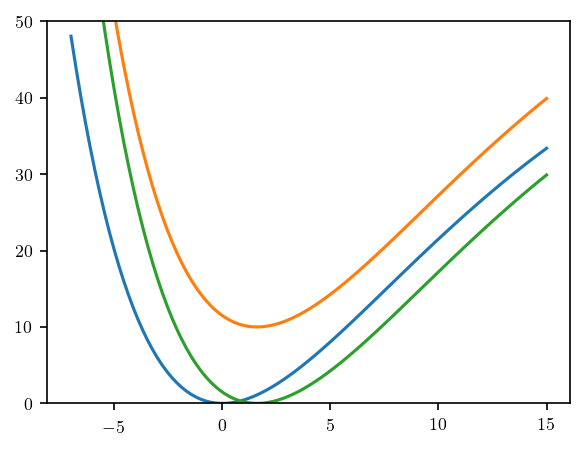

In [64]:
xs = np.linspace(-7, 15, 100)
plt.plot(xs, poly_from_lambdas(xs, lambda_g))
plt.plot(xs, 10+poly_from_lambdas(xs, lambda_e))
plt.plot(xs, poly_from_lambdas(xs, lambda_e))
plt.ylim([0,50])

In [67]:
lambda_e = dom.displaced_lambdas(lambda_g, d)

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_fig1_inst = dom.anharmonic_mat_exp_implementation(
    lambda_g,
    lambda_e,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )
    
em_lin_anda_impl_fig1 = anda_impl_fig1_inst.emission_lineshape(
    hbar_ws)

In [68]:
lambda_e

array([ 1.48438432e+00, -1.99430315e+00,  2.60887573e-01, -6.39277637e-02,
        3.32036657e-03, -1.28601538e-04,  4.02549008e-06, -1.06464643e-07,
        2.44664875e-09, -4.97972064e-11,  9.08005696e-13, -1.46030336e-14,
        1.72033000e-16])

In [69]:
lambda_e

array([ 1.48438432e+00, -1.99430315e+00,  2.60887573e-01, -6.39277637e-02,
        3.32036657e-03, -1.28601538e-04,  4.02549008e-06, -1.06464643e-07,
        2.44664875e-09, -4.97972064e-11,  9.08005696e-13, -1.46030336e-14,
        1.72033000e-16])

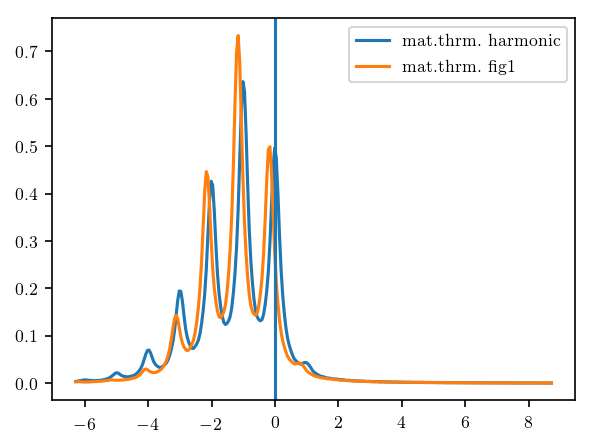

In [70]:
plt.plot((hbar_ws-d**2/2), em_lin_mat_thrm*2, label='mat.thrm. harmonic')
plt.plot((hbar_ws-d**2/2), em_lin_anda_impl_fig1*2, label='mat.thrm. fig1')
plt.axvline(0)
plt.legend()

In [71]:
lambda_e_p10v = np.copy(lambda_e)
lambda_e_p10v[0] += 10

# test_T = .3*test_hbarw0/k
test_T = .3*test_hbarw0/kb

anda_impl_fig1_inst_wplus10 = dom.anharmonic_mat_exp_implementation(
    lambda_g,
    lambda_e_p10v,
    basis_size,
    hbarw0=test_hbarw0,
    hbar_gamma=.18,
    unitless_d=d,
    T=.3/kb,
    integration_t_max=20,
    integration_t_points=600,
    calc_matricies_on_init=True,
    A_mat_order=7,
    )
    
em_lin_anda_impl_fig1_wplus10 = anda_impl_fig1_inst_wplus10.emission_lineshape(
    hbar_ws)

In [72]:
lambda_e_p10v

array([ 1.14843843e+01, -1.99430315e+00,  2.60887573e-01, -6.39277637e-02,
        3.32036657e-03, -1.28601538e-04,  4.02549008e-06, -1.06464643e-07,
        2.44664875e-09, -4.97972064e-11,  9.08005696e-13, -1.46030336e-14,
        1.72033000e-16])

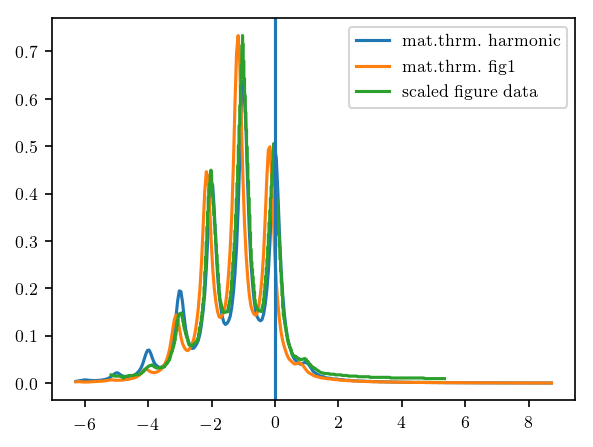

In [73]:
plt.plot((hbar_ws-d**2/2), em_lin_mat_thrm*2, label='mat.thrm. harmonic')
plt.plot((hbar_ws-d**2/2), (em_lin_anda_impl_fig1_wplus10)*2, label='mat.thrm. fig1')
plt.plot(
    anda_fig_1_thieved.T[0], 
    (
        anda_fig_1_thieved.T[1]
        /(anda_fig_1_thieved.T[1].max())
        *(em_lin_anda_impl_fig1_wplus10*2).max()
        ),
    label='scaled figure data'
    )
plt.axvline(0)
plt.legend()

Try accounting lambda[2] in the shift

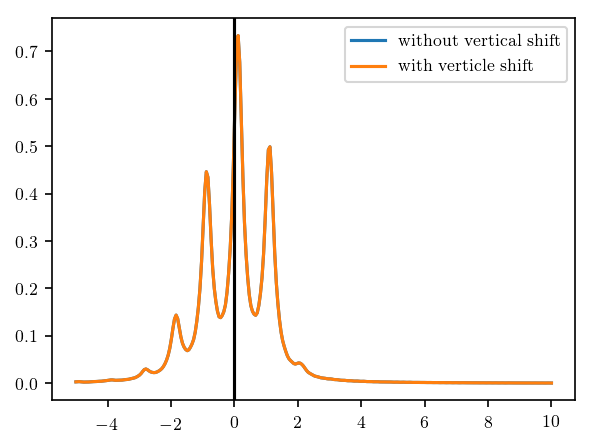

In [50]:
plt.plot((hbar_ws), em_lin_anda_impl_fig1_wplus10*2, label='without vertical shift')
plt.plot((hbar_ws), (em_lin_anda_impl_fig1_wplus10)*2, label='with verticle shift')
# plt.plot(
#     anda_fig_1_thieved.T[0], 
#     (
#         anda_fig_1_thieved.T[1]
#         /(anda_fig_1_thieved.T[1].max())
#         *(em_lin_anda_impl_fig1_wplus10*2).max()
#         ),
#     label='scaled figure data'
#     )
plt.axvline(0, c = 'k')
plt.legend()

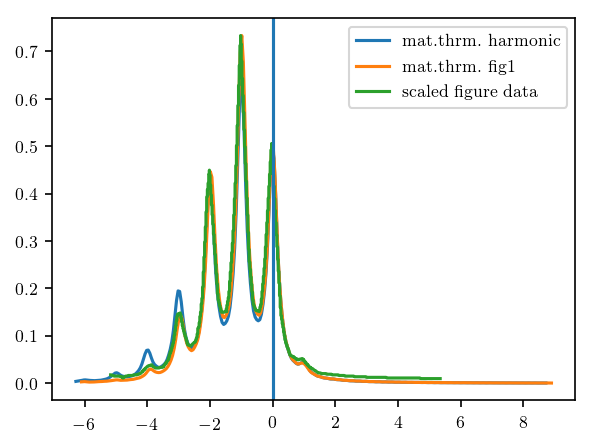

In [52]:
plt.plot((hbar_ws-d**2/2), em_lin_mat_thrm*2, label='mat.thrm. harmonic')
plt.plot((hbar_ws-1.10334293), (em_lin_anda_impl_fig1_wplus10)*2, label='mat.thrm. fig1')
plt.plot(
    anda_fig_1_thieved.T[0], 
    (
        anda_fig_1_thieved.T[1]
        /(anda_fig_1_thieved.T[1].max())
        *(em_lin_anda_impl_fig1_wplus10*2).max()
        ),
    label='scaled figure data'
    )
plt.axvline(0)
plt.legend()

In [27]:
lambda_g[2]

0.00014099999999994672

In [28]:
lambda_e[2]

0.2608875732057088

In [30]:
anda_impl_fig1_inst.calc_hbar_omega_eg(
    anda_impl_fig1_inst.basis_size,
    anda_impl_fig1_inst.poly_prefs_g,
    anda_impl_fig1_inst.poly_prefs_e,
    anda_impl_fig1_inst.T)

array([[1.10334293, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.10334293, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.10334293, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.10334293, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

In [57]:
anda_impl_fig1_inst_wplus10.calc_hbar_omega_eg(
    anda_impl_fig1_inst_wplus10.basis_size,
    anda_impl_fig1_inst_wplus10.poly_prefs_g,
    anda_impl_fig1_inst_wplus10.poly_prefs_e,
    anda_impl_fig1_inst_wplus10.T)

array([[-8.89665707,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -8.89665707,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -8.89665707,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -8.89665707,  0.        ,
         0.        ,  0.        ,  0.        ,  

In [35]:
for test_k in range(12):
    test_exptec_x = np.trace(
        anda_impl_fig1_inst.x_tothe_k(test_k, anda_impl_fig1_inst.basis_size)
        @
        anda_impl_fig1_inst.rho_e
        )
    print(test_exptec_x)

0.9999999999999998
1.6739483796532222
3.3444912686702857
7.448741373381085
18.08908606526203
47.16958693715189
130.77791412717775
382.66867557357546
1175.1469932699658
3770.4838074728186
12593.702435418436
43655.320457768314
